In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Student Table

In [ ]:
studentdf = pd.read_csv('raw-csv-files/student.csv')
studentdf

Dropping email column and making ID the index.

In [ ]:
studentdf = studentdf.drop(columns='Email')
studentdf = studentdf.set_index('ID')
studentdf

# Teacher Table

In [ ]:
teacherdf = pd.read_csv('raw-csv-files/teacher.csv')
teacherdf

Dropping email column and making ID the index.

In [ ]:
teacherdf = teacherdf.drop(columns='Email')
teacherdf = teacherdf.set_index('ID')
teacherdf

# Course Table

In [ ]:
coursedf = pd.read_csv('raw-csv-files/course.csv')
coursedf

Making ID the index.

In [ ]:
coursedf = coursedf.set_index('ID')
coursedf

# Administrator Table

In [ ]:
admindf = pd.read_csv('raw-csv-files/admin.csv')
admindf

Dropping email column and making ID the index.

In [ ]:
admindf = admindf.drop(columns='Email')
admindf = admindf.set_index('ID')
admindf

# Grades Table

In [ ]:
gradesdf = pd.read_csv('raw-csv-files/grade.csv')
gradesdf

Rename 'Grade ID' column to just 'ID' and make ID the index

In [ ]:
gradesdf.rename(columns={'Grade ID': 'ID'}, inplace=True)
gradesdf = gradesdf.set_index('ID')
gradesdf

# Load to CSV

Pushing clean datasets to their respective csv files

In [ ]:
admindf.to_csv('clean-csv-files/admindf_clean.csv')
coursedf.to_csv('clean-csv-files/coursedf_clean.csv') 
gradesdf.to_csv('clean-csv-files/gradesdf_clean.csv') 
studentdf.to_csv('clean-csv-files/studentdf_clean.csv') 
teacherdf.to_csv('clean-csv-files/teacherdf_clean.csv') 

In [76]:
gradesdf.head()

,Student ID,Course ID,Grade
ID,,,
1,1,1,90
2,1,2,80
3,3,3,70
4,6,4,60
5,2,5,74


# Visualizations

Average Grade across all Courses: 71.28


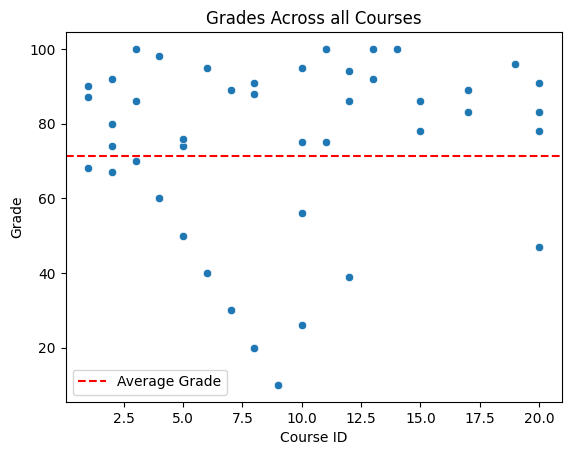

In [87]:
avg_grade = gradesdf['Grade'].mean()
sns.scatterplot(data=gradesdf, x="Course ID", y="Grade")
plt.axhline(y=avg_grade, color='red', linestyle='--', label='Average Grade')
plt.title('Grades Across all Courses')
print("Average Grade across all Courses:", avg_grade)
plt.legend(loc= 'lower left')

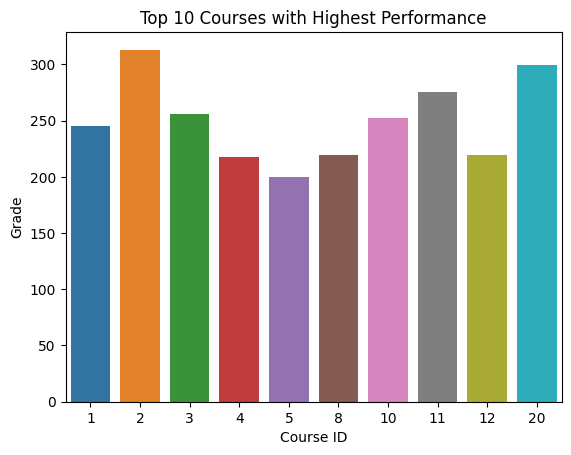

In [73]:
perf = gradesdf.groupby('Course ID')['Grade'].sum().nlargest(10)

# Use seaborns barplot function to create vertical bars for each Course
sns.barplot(x = perf.index, y = perf.values)
plt.title('Top 10 Courses with Highest Performance')
plt.xlabel('Course ID')
plt.ylabel('Grade')
plt.show()

Course ID 1: Math 101
Course ID 2: English 101
Course ID 3: Science 101
Course ID 4: History 101
Course ID 5: Computer Science 101
Course ID 8: German 101
Course ID 10: Music 101
Course ID 11: P.E
Course ID 12: Health 101
Course ID 20: Journalism 101

<Figure size 2000x500 with 0 Axes>

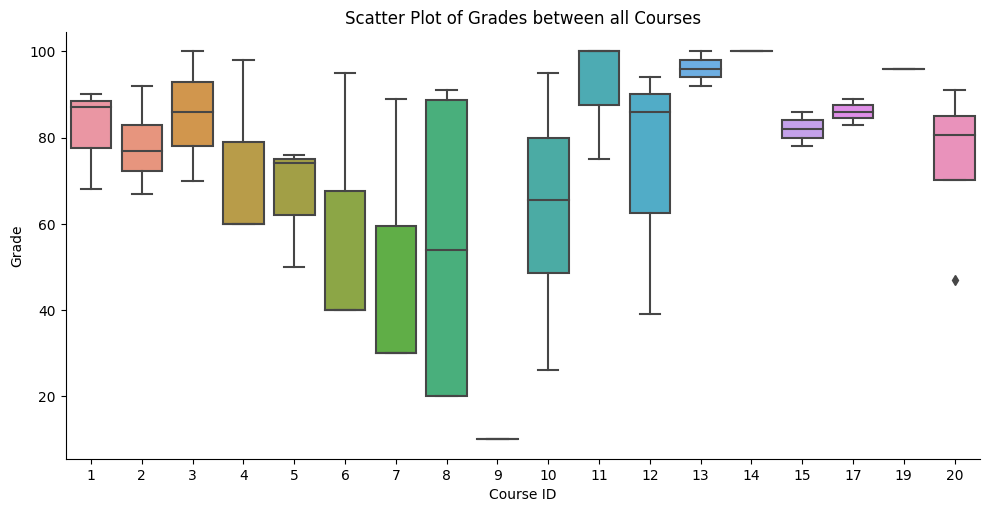

In [6]:
plt.figure(figsize=(20,5))
sns.catplot(data=gradesdf, x="Course ID", y="Grade", kind="box", height=5, aspect=2)

plt.title('Scatter Plot of Grades between all Courses')
plt.xlabel('Course ID')
plt.ylabel('Grade')
plt.show()